In [1]:
#First, let’s import the necessary libraries and store the data in our system for analysis
#Importing data using the pandas library
#Understanding the structure of the data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [10]:
data=pd.read_csv('CarPrice_Assignment.csv');
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
print(data.shape);
data.info()
#non-null values
#type of input
#start sorting the data

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    

In [15]:
data['CarName'].unique()
#unique names

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [16]:
#Too many unique values. Need to split it into single car names
data['CarName']=data['CarName'].apply(lambda x: x.split(' ')[0]);
print(data['CarName'].head());
data['CarName'].unique()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [17]:
# Similar car names have different spellings;

def Name_replace(name1,name2):
    data['CarName'].replace(name1,name2,inplace=True);

Name_replace('maxda','mazda');
Name_replace('Nissan','nissan');
Name_replace('porcshce','porsche');
Name_replace('toyouta','toyota');
Name_replace('vokswagen','volkswagen');
Name_replace('vw','volkswagen');

data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [18]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [19]:
data.skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

In [20]:
#Creating Functions to help in drawing different types of plots

In [21]:
def scatter_plot(x,figure):
    plt.subplot(5,2,figure);
    plt.scatter(data[x],data['price']);
    plt.title(x+' vs Price');
    plt.ylabel('price');
    plt.xlabel(x);
    plt.xticks(rotation=90);

In [22]:
def count_plot(y,palette):
    fig=plt.subplots(figsize=(20,6));
    sns.countplot(y,data=data,palette=palette);
    plt.xticks(rotation=90);
    
def avg_var_plot(z):
    data1=pd.DataFrame(data.groupby([z])['price'].mean().sort_values(ascending=False)).plot.bar(figsize=(20,8));
    plt.title(z+' vs AvgPrice');
    plt.xticks(rotation=90);
    plt.ylabel('price')

In [25]:
#Visualizing Categorical Data
#price vs car name

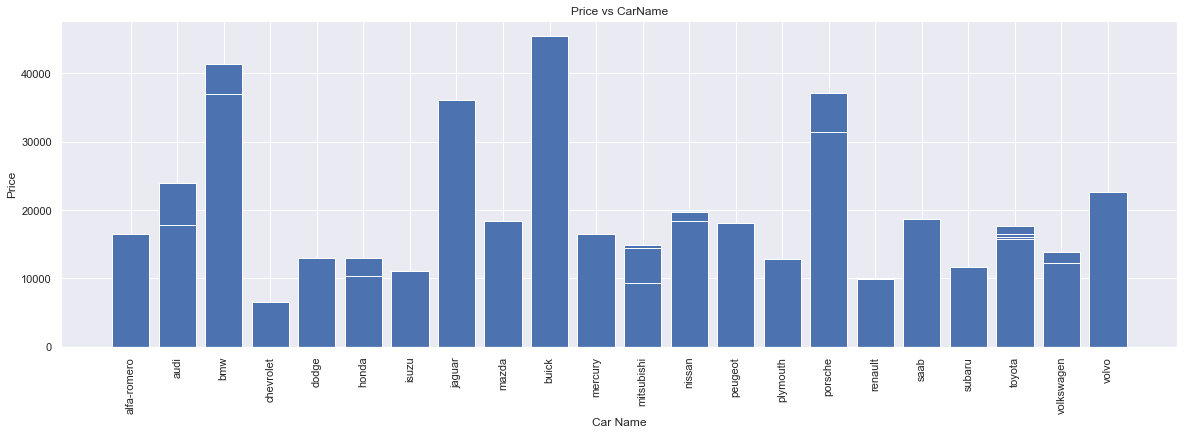

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

fig=plt.subplots(figsize=(20,6));
plt.bar(data['CarName'],data['price']);
plt.xlabel('Car Name');
plt.ylabel('Price');
plt.title('Price vs CarName')
plt.xticks(rotation=90);

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


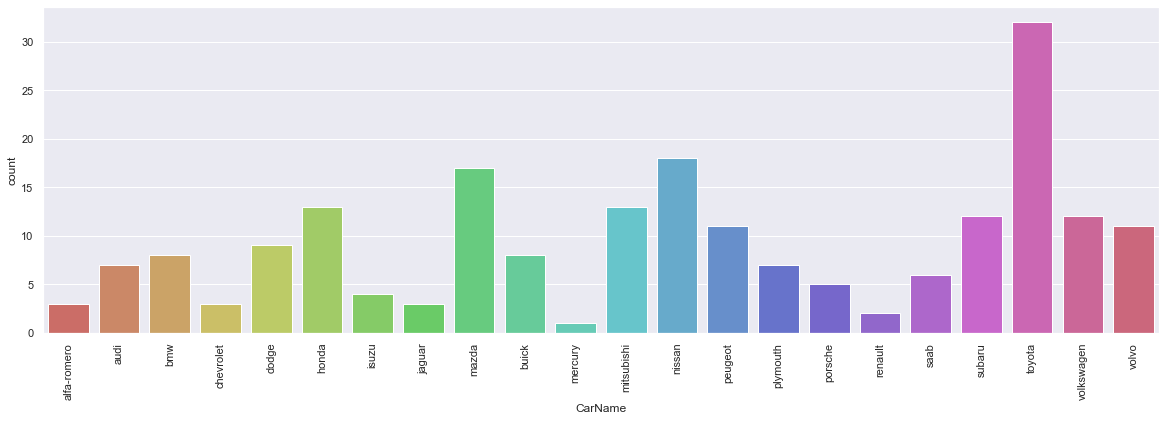

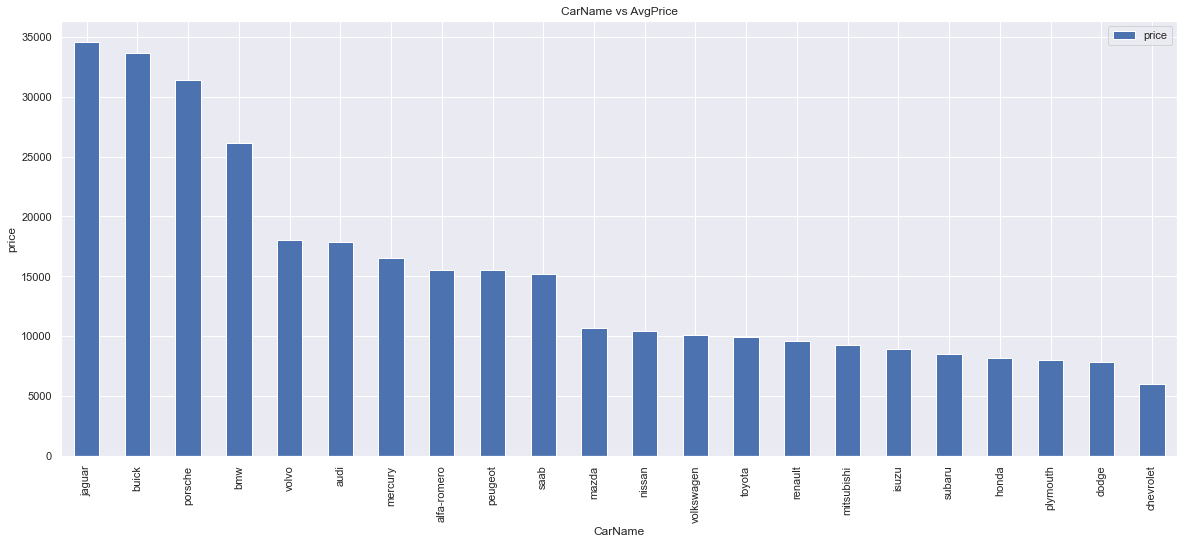

In [26]:
count_plot('CarName','hls');
avg_var_plot('CarName');
#Toyota is the most preferred choice of car and is less expensive.

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


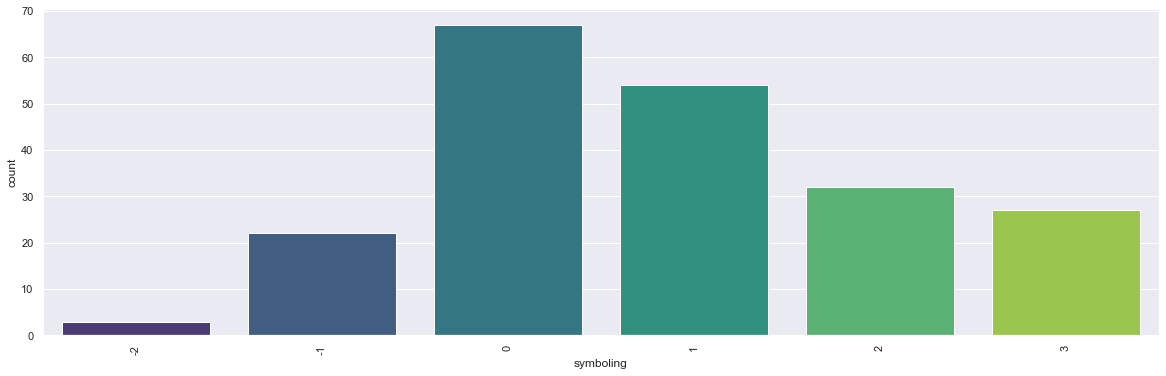

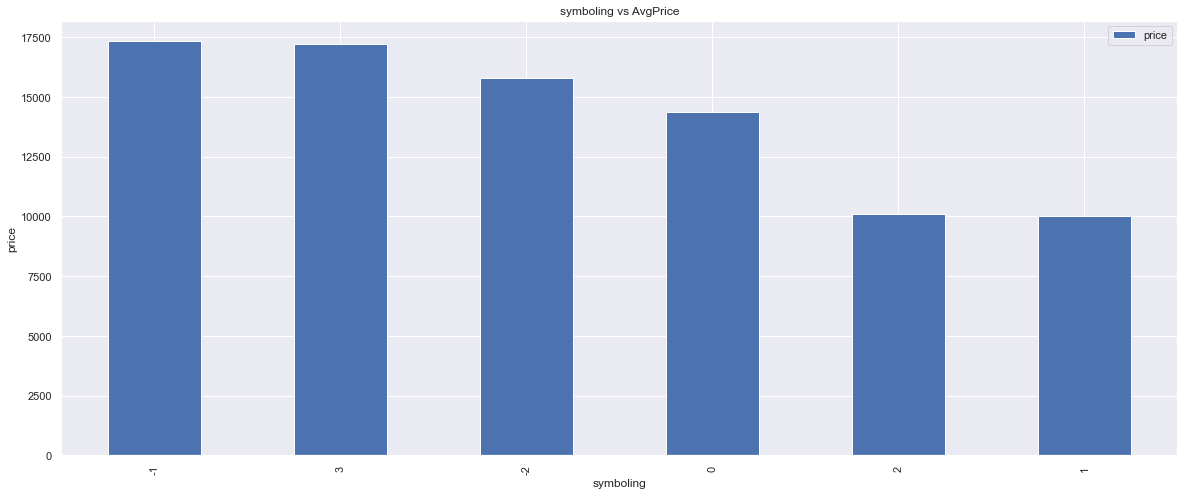

In [27]:
count_plot('symboling','viridis');
avg_var_plot('symboling');

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


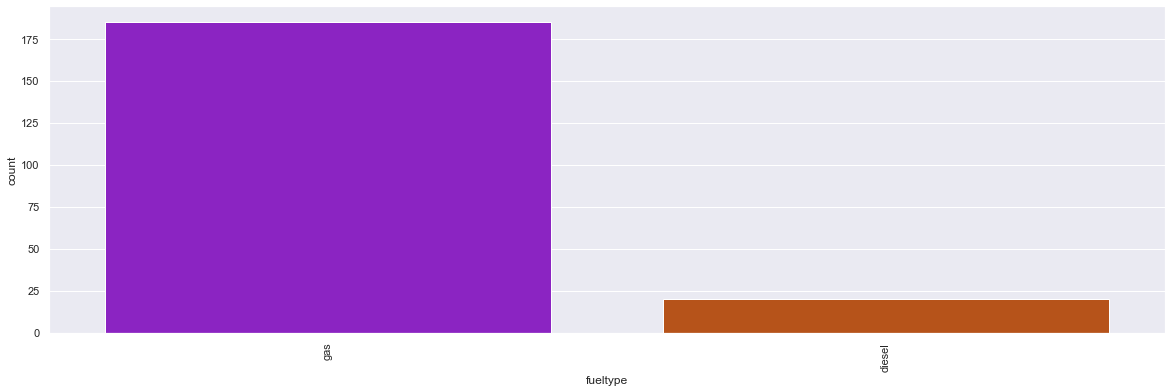

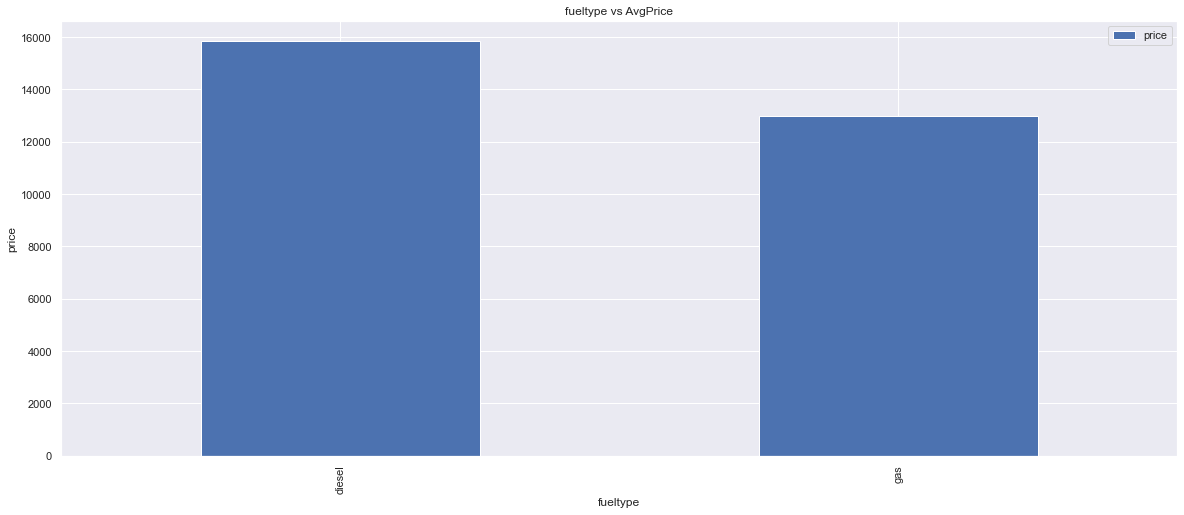

In [28]:
count_plot('fueltype','gnuplot');
avg_var_plot('fueltype');

#Gas is the most preferred fuel type and is cheaper than diesel.

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


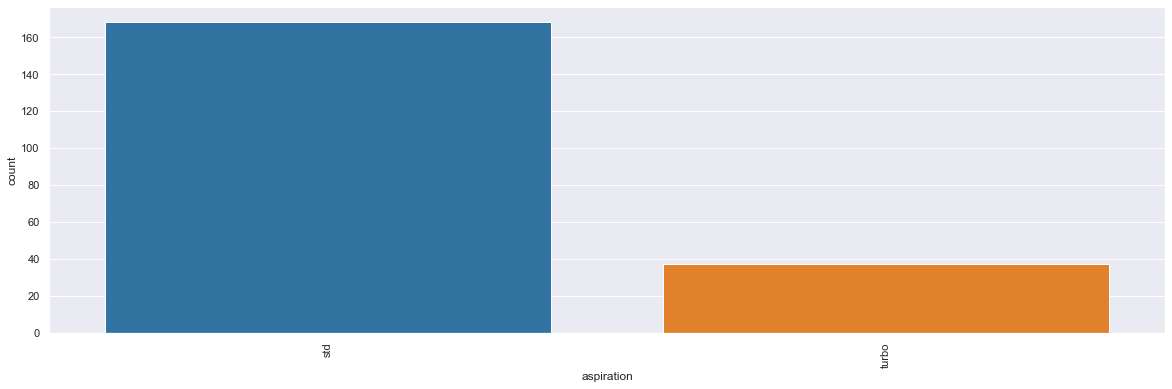

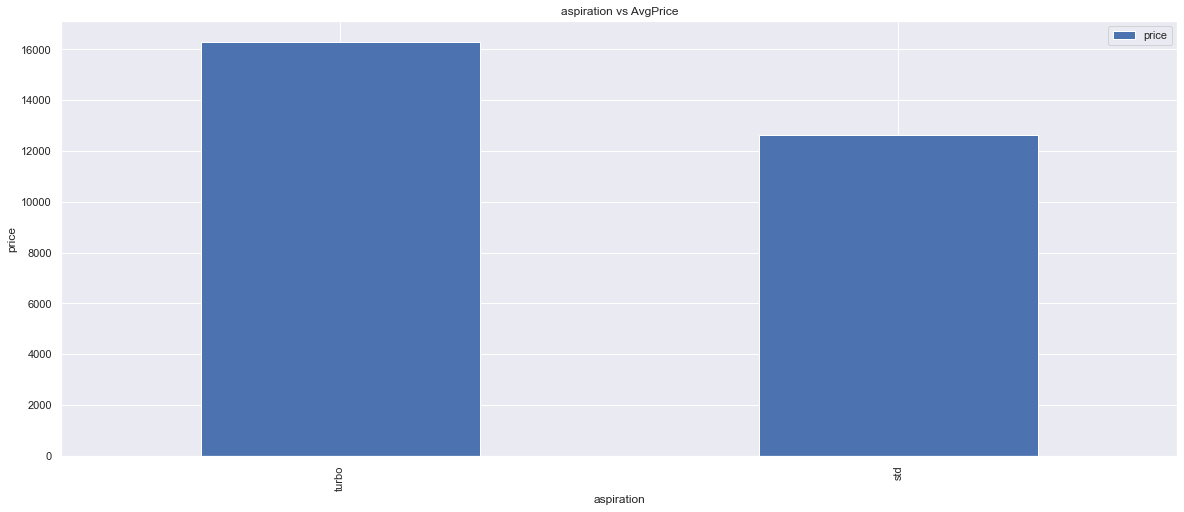

In [29]:
count_plot('aspiration','tab10');
avg_var_plot('aspiration');

#Std is most preferred and is cheaper.

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


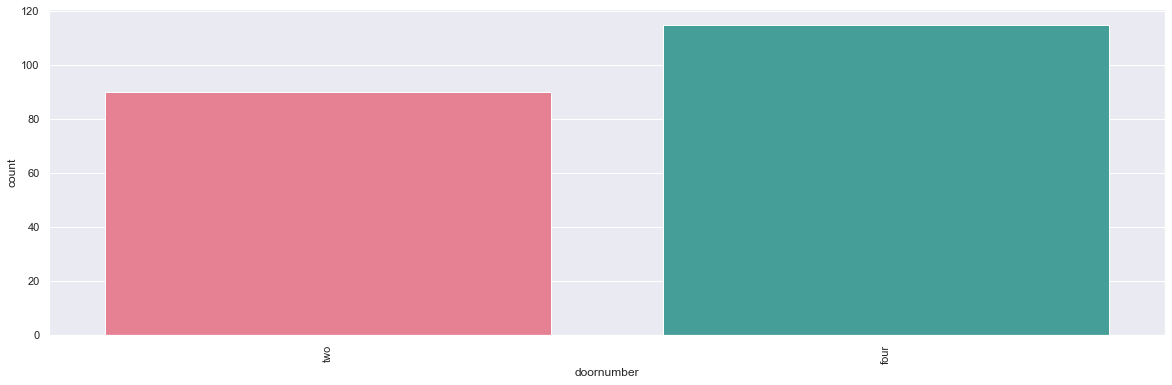

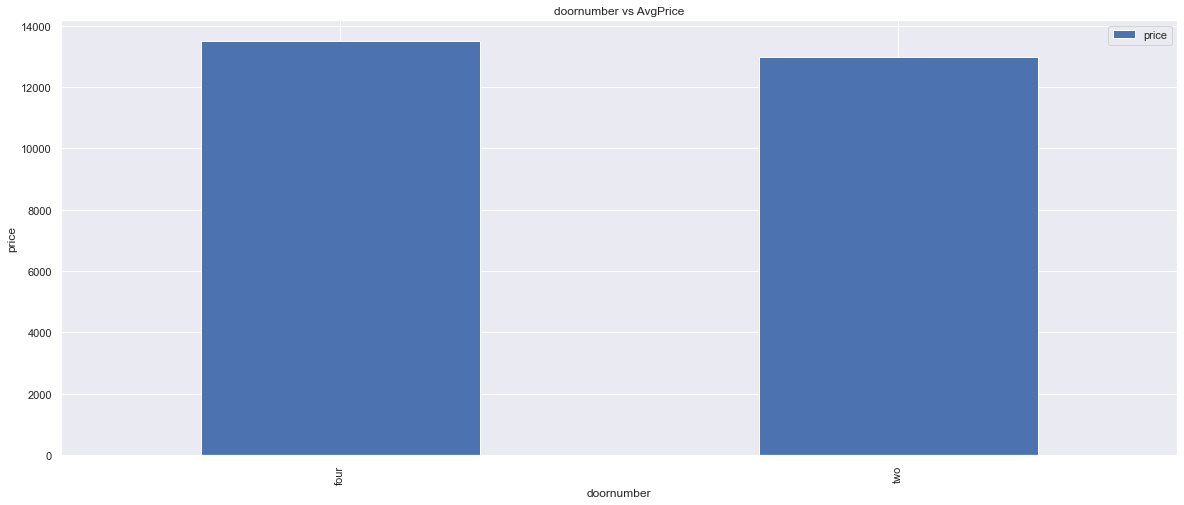

In [30]:
count_plot('doornumber','husl');
avg_var_plot('doornumber');

#there is not much difference between the door numbers in terms of price and count

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


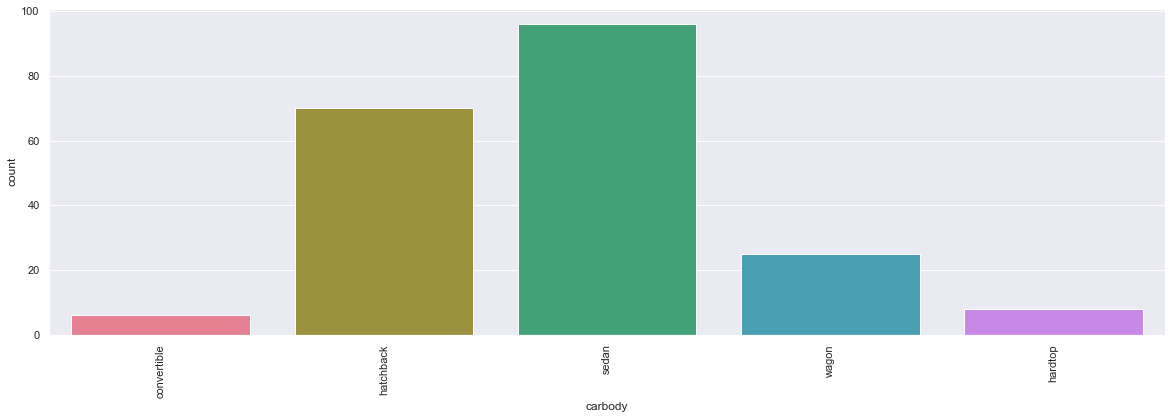

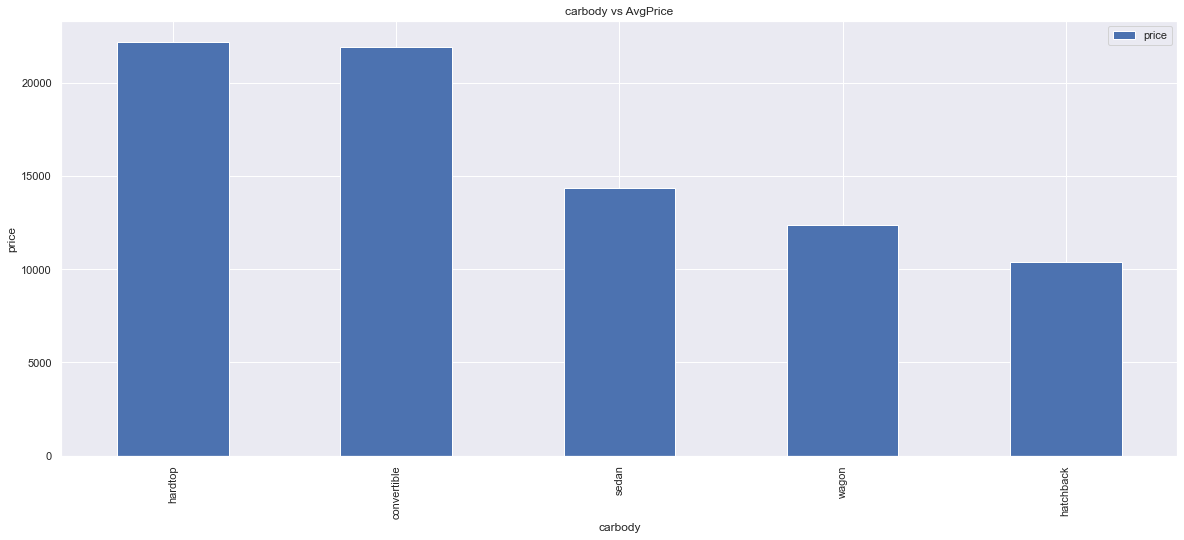

In [31]:
count_plot('carbody','husl');
avg_var_plot('carbody');

#Sedan is the most preferred choice and is cheaper


C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


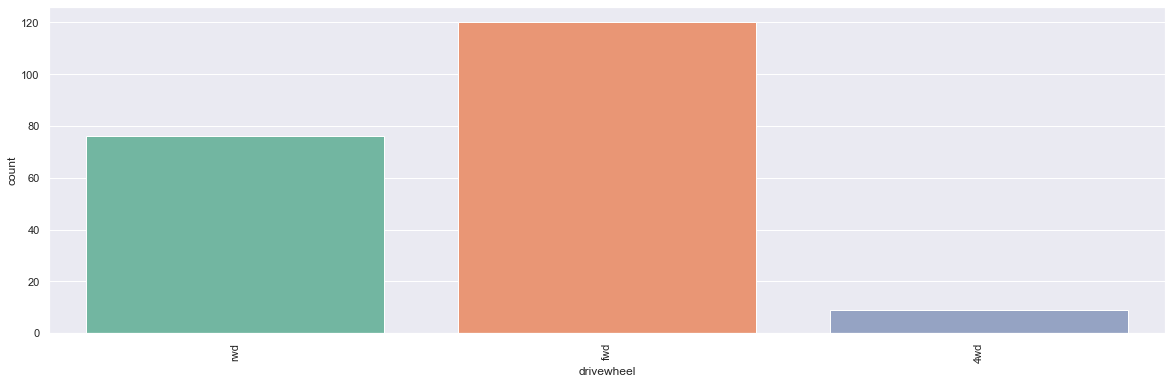

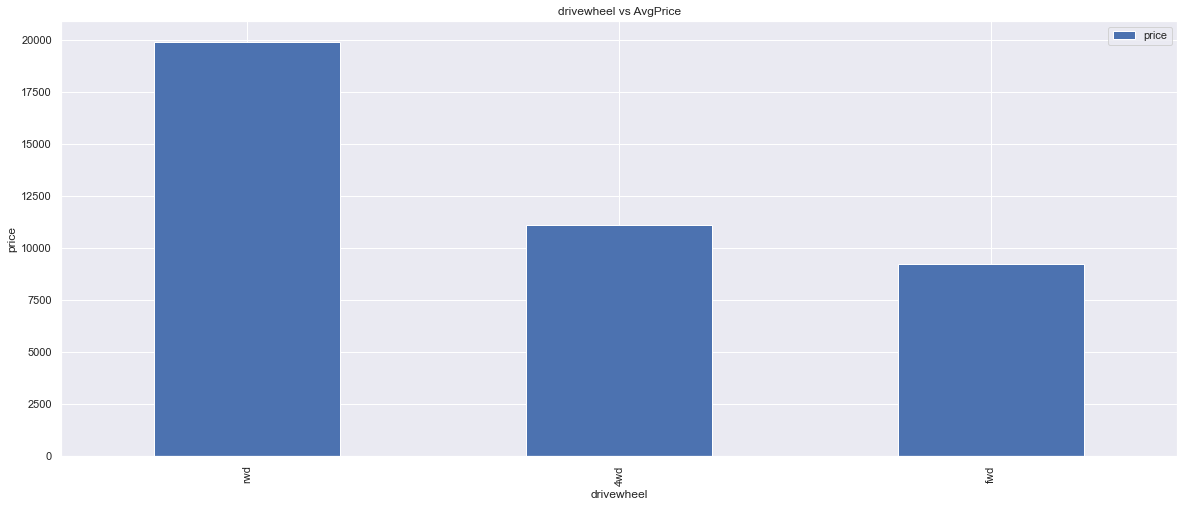

In [32]:
count_plot('drivewheel','Set2');
avg_var_plot('drivewheel');

#fwd is preferred and is cheap

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


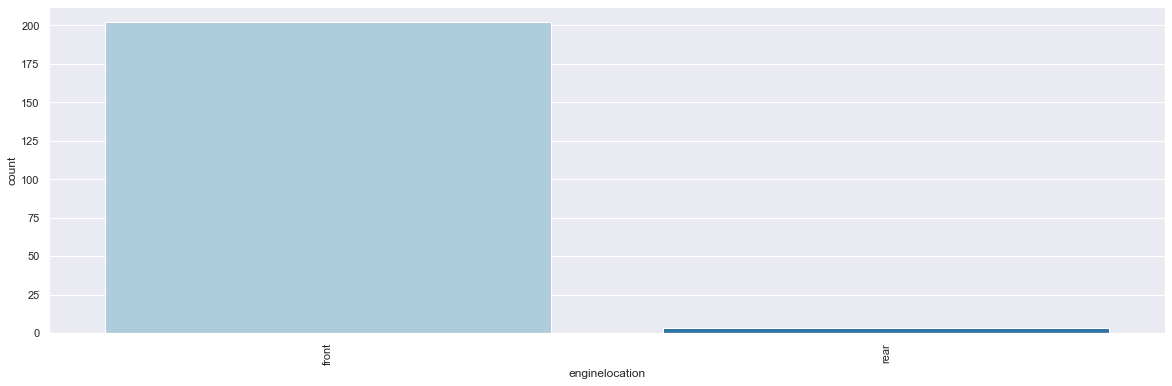

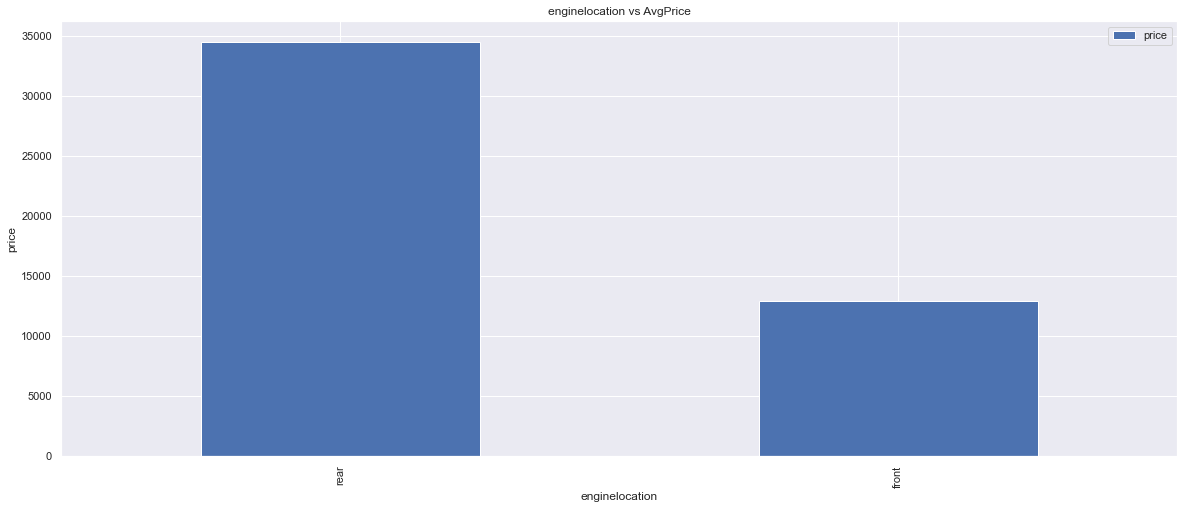

In [33]:
count_plot('enginelocation','Paired');
avg_var_plot('enginelocation');

#Cars with engine at the front are more in number and relatively cheap


C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


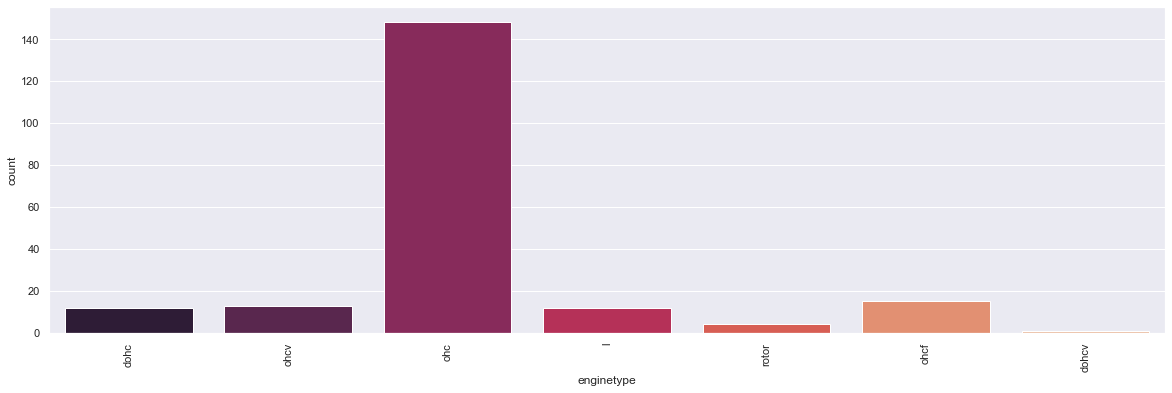

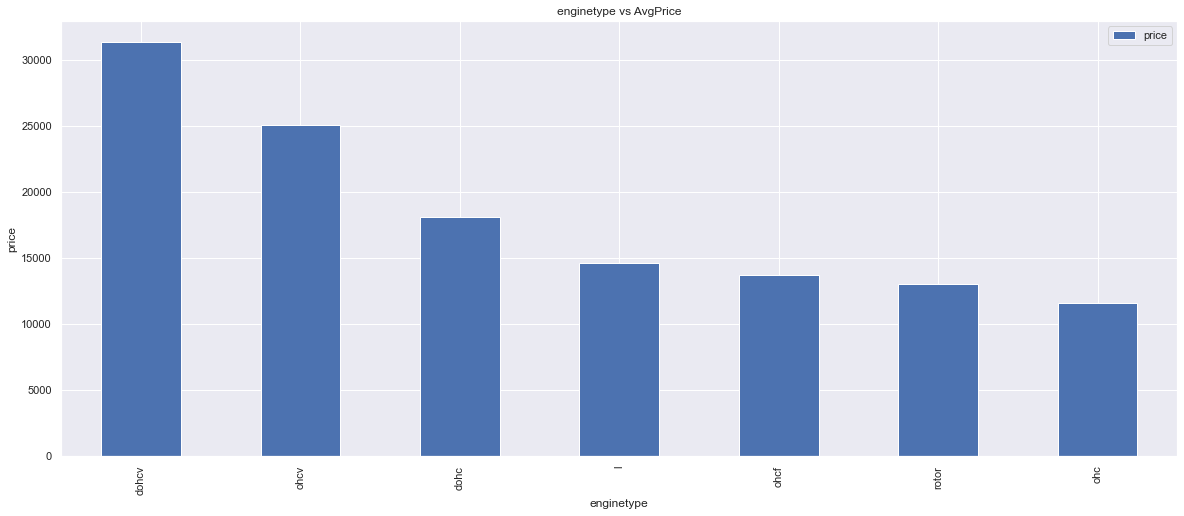

In [34]:
count_plot('enginetype','rocket');
avg_var_plot('enginetype');

#Ohc is the preferred engine type and is the cheapest

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


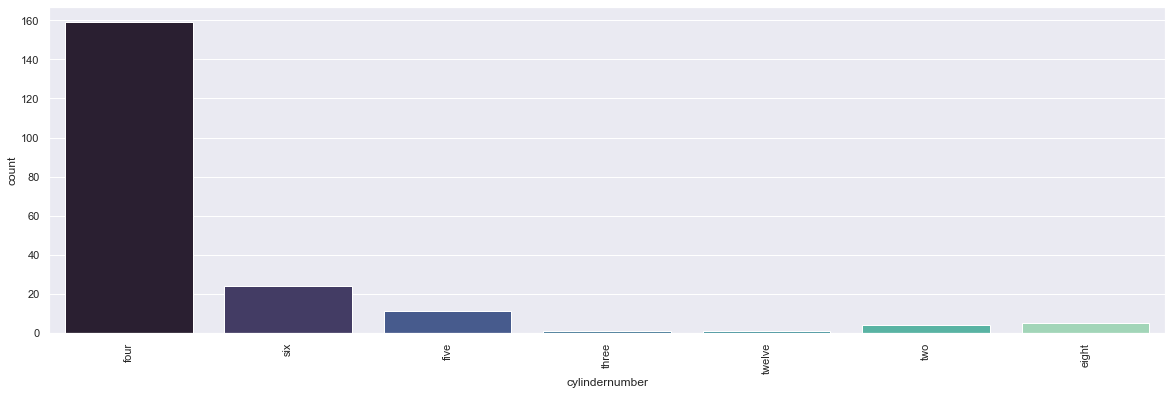

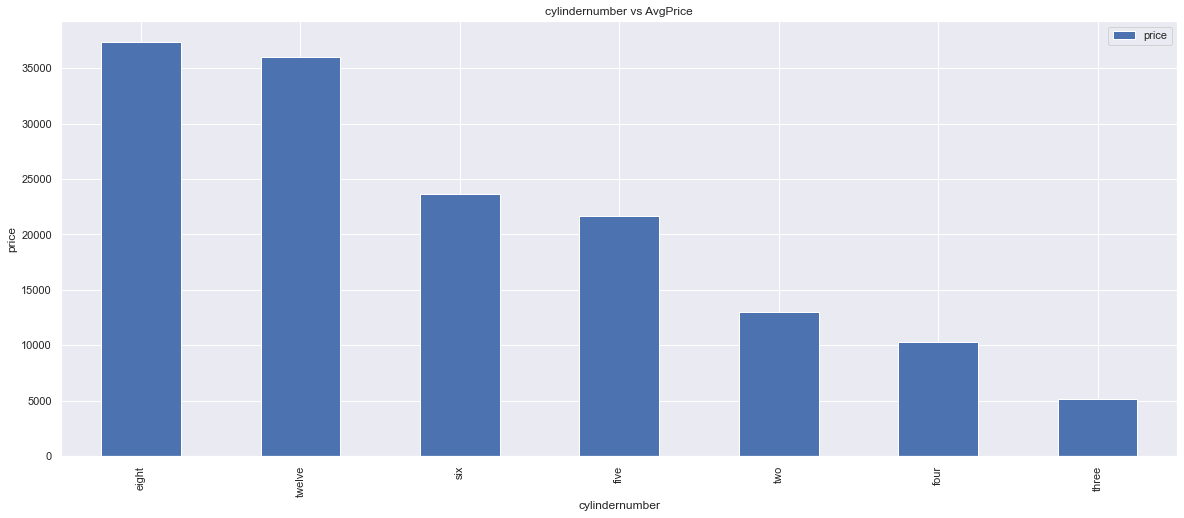

In [35]:
count_plot('cylindernumber','mako');
avg_var_plot('cylindernumber');

#cars with 4 cylinder number are in abundance and are relatively cheaper

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


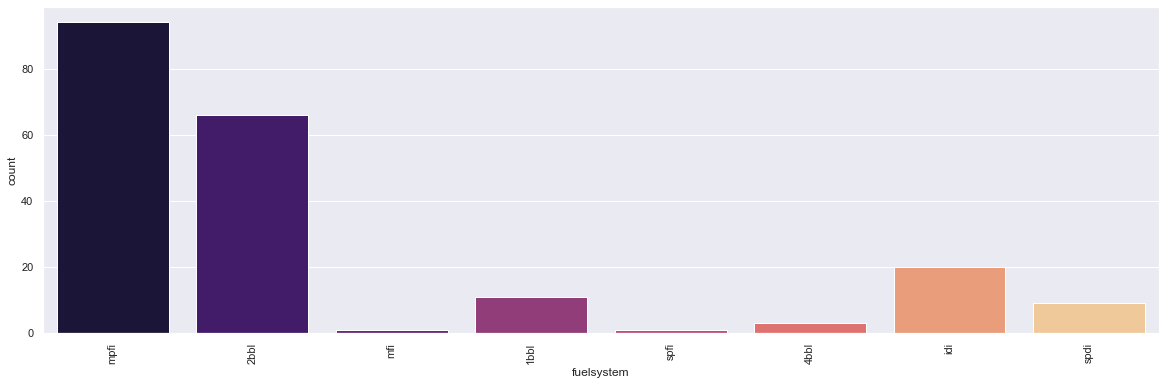

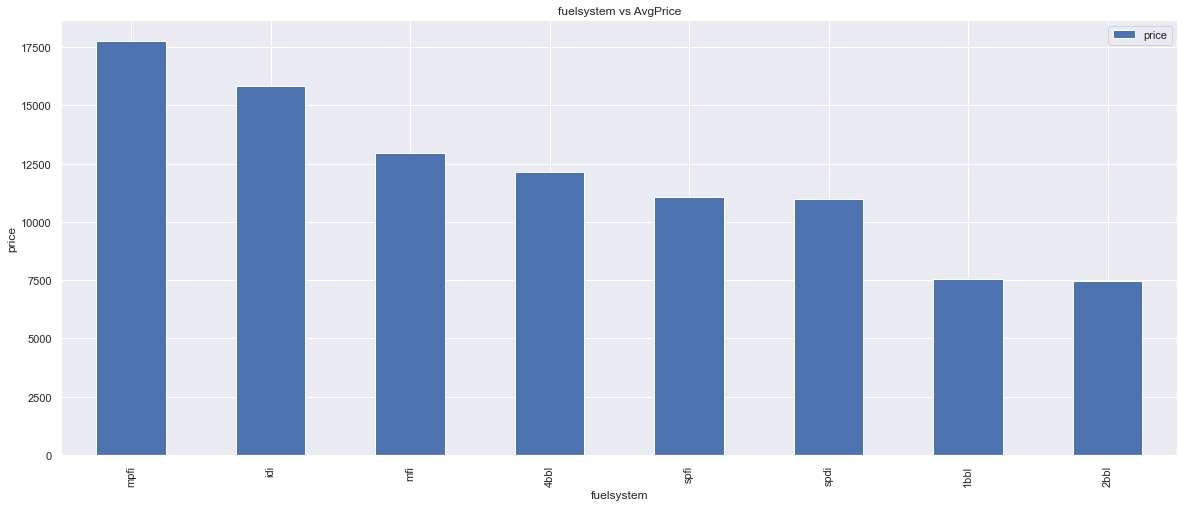

In [36]:
count_plot('fuelsystem','magma');
avg_var_plot('fuelsystem');

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

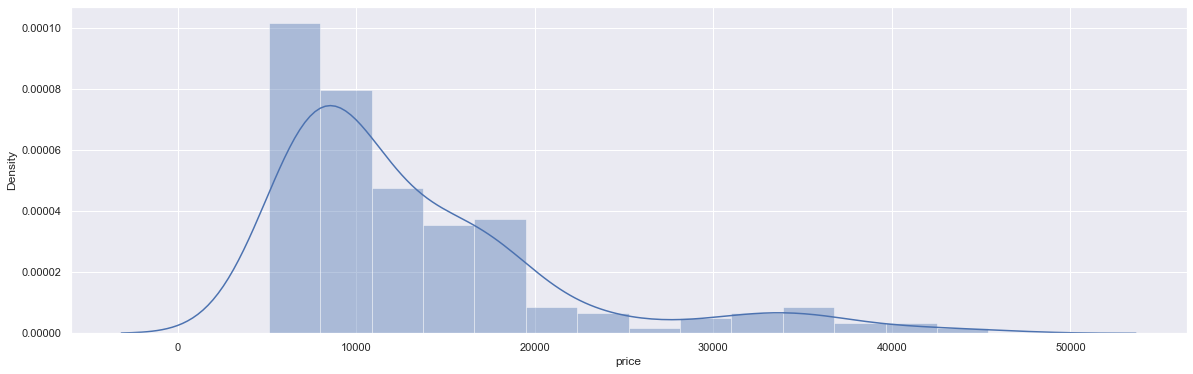

In [37]:
fig=plt.subplots(figsize=(20,6))
sns.distplot(data.price)

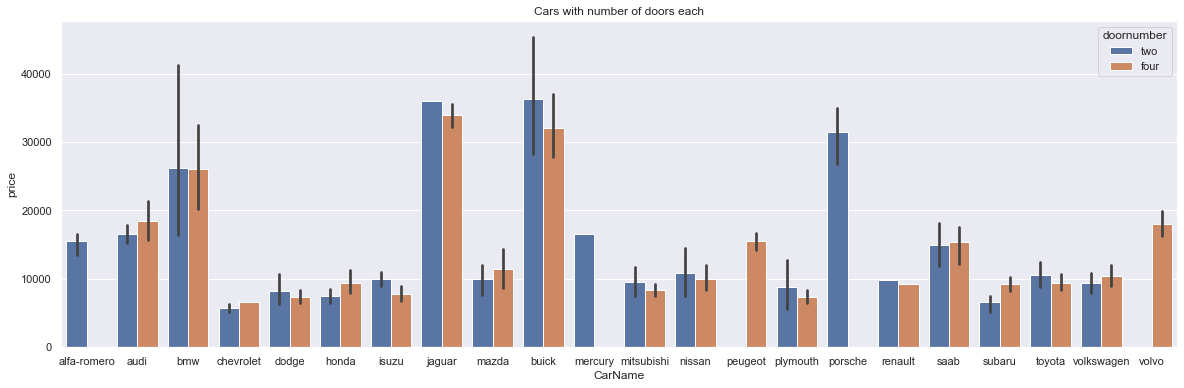

In [38]:
fig=plt.subplots(figsize=(20,6));
sns.barplot(x='CarName',y='price',hue='doornumber',data=data)
plt.title('Cars with number of doors each');
#cars with no. of doors each vs price


In [39]:
data['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

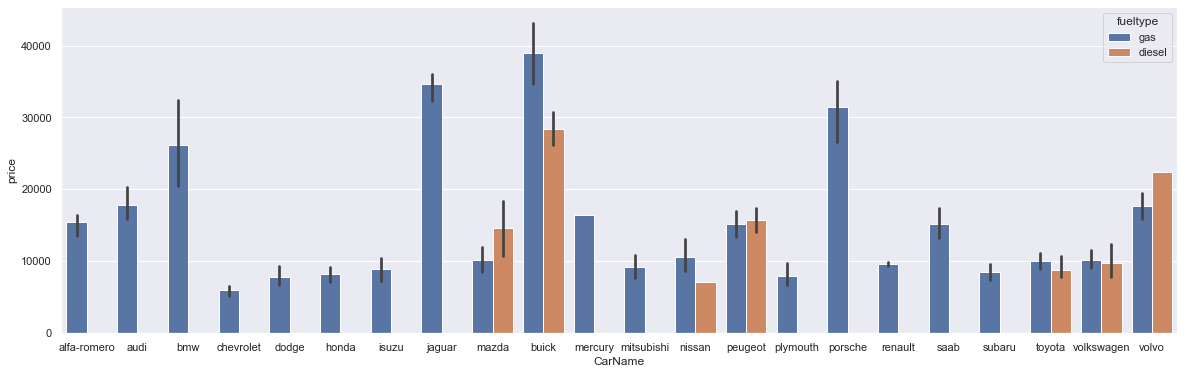

In [40]:
fig=plt.subplots(figsize=(20,6));
sns.barplot(x='CarName',y='price',hue='fueltype',data=data);
#fuel type gasvs diesel

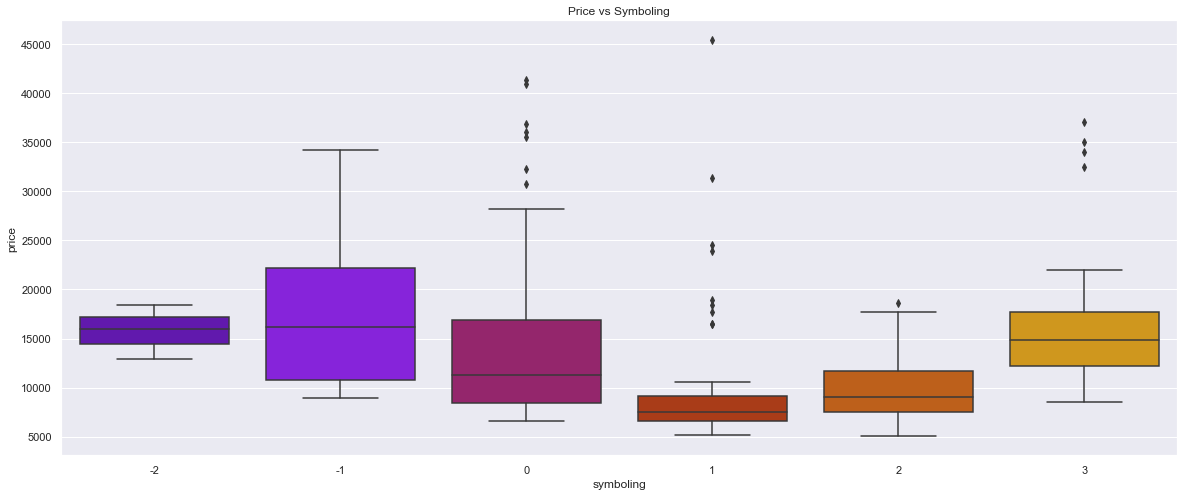

In [41]:
plt.figure(figsize=(20,8));
sns.boxplot(x=data['symboling'],y=data['price'],palette='gnuplot')
plt.title('Price vs Symboling');

In [42]:
#Visualizing Numeric Data

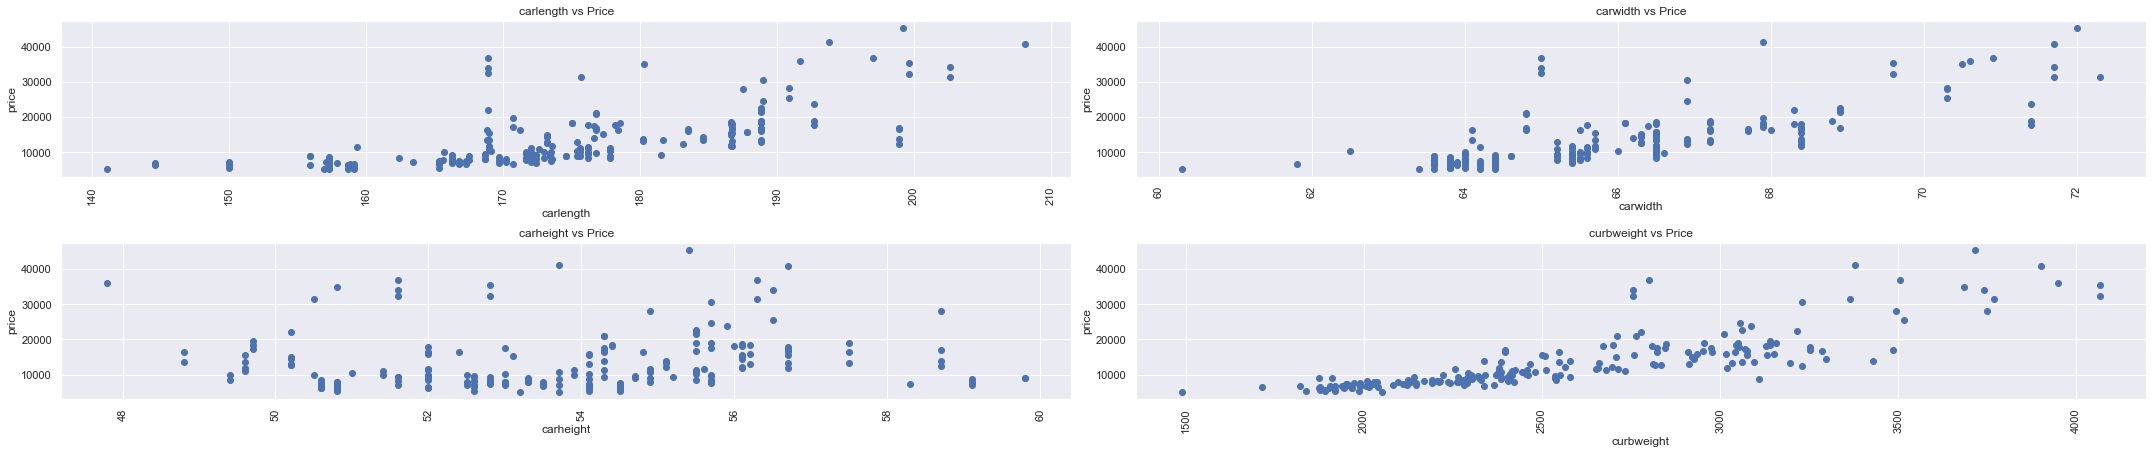

In [43]:
plt.figure(figsize=(30,15));
scatter_plot('carlength',1);
scatter_plot('carwidth',2);
scatter_plot('carheight',3);
scatter_plot('curbweight',4);
plt.tight_layout();

#Carlength, carwidth, curbweigt show linear positive trend with price whereas carheight show no trend with price;

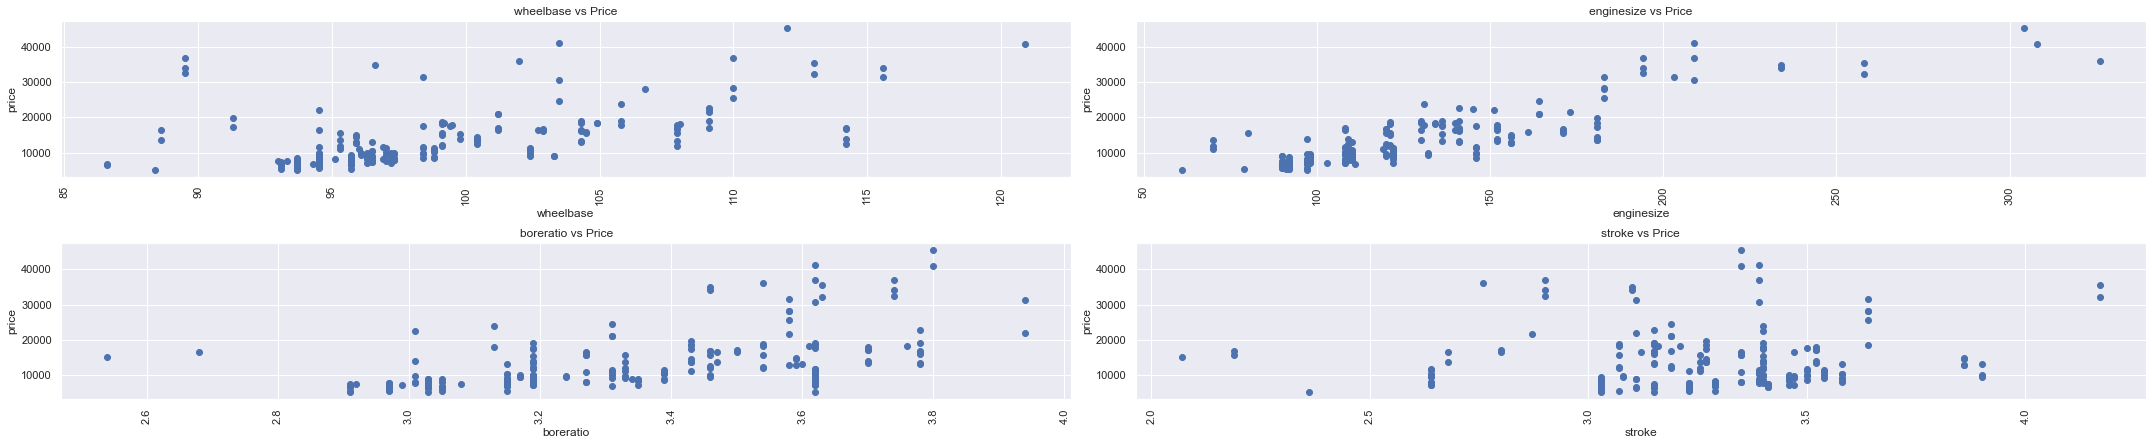

In [44]:
plt.figure(figsize=(30,15));
scatter_plot('wheelbase',1);
scatter_plot('enginesize',2);
scatter_plot('boreratio',3);
scatter_plot('stroke',4);
plt.tight_layout()
#wheelbase, enginesize, boreratio show positive trend with price;

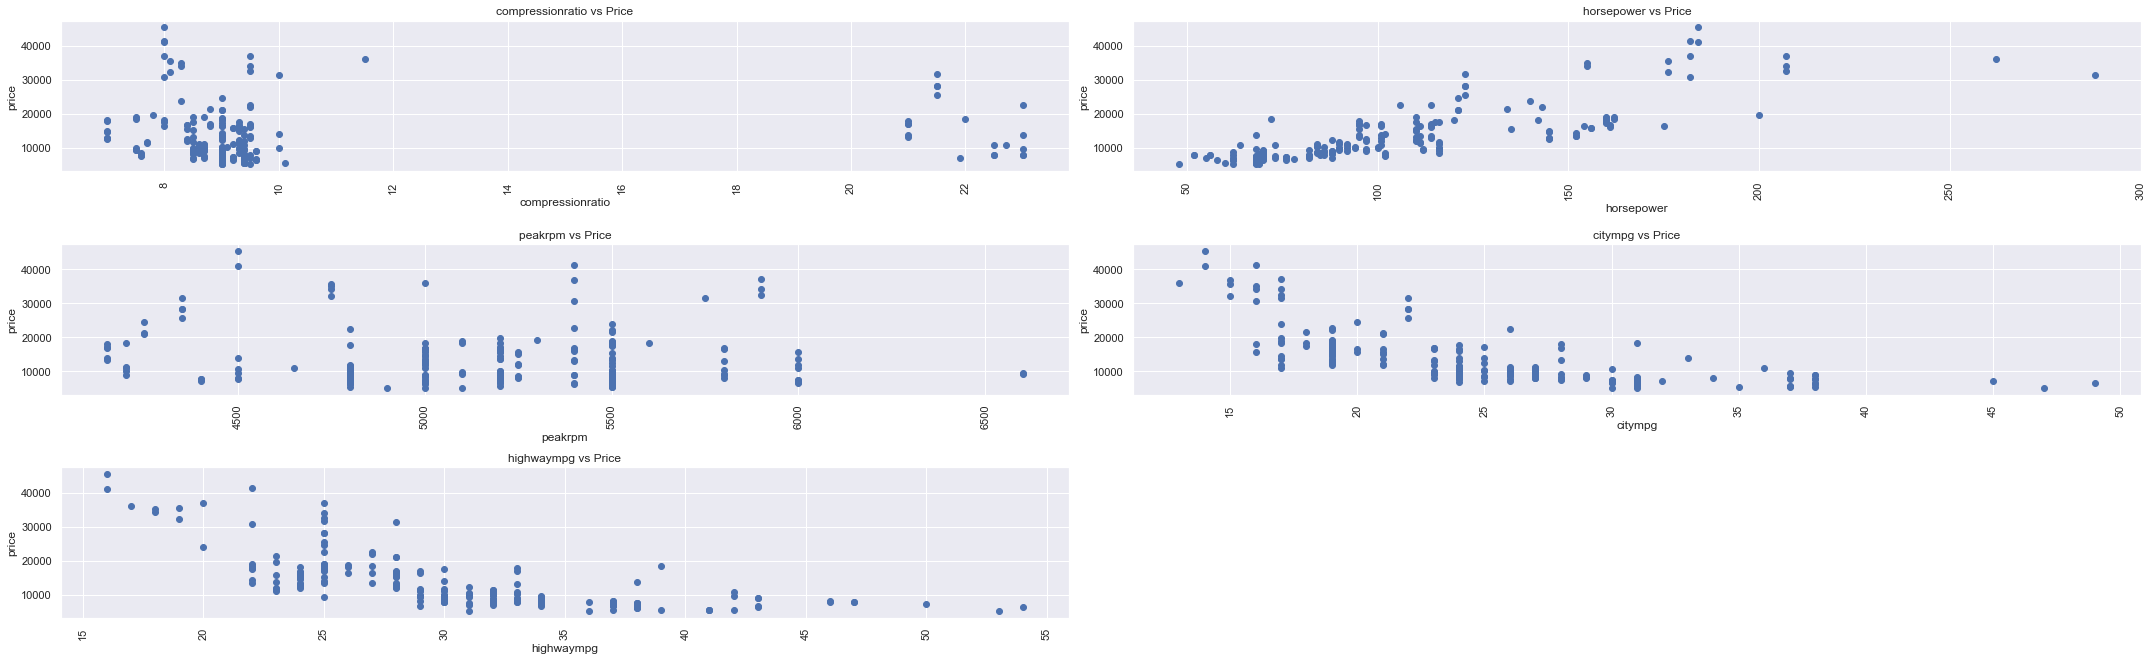

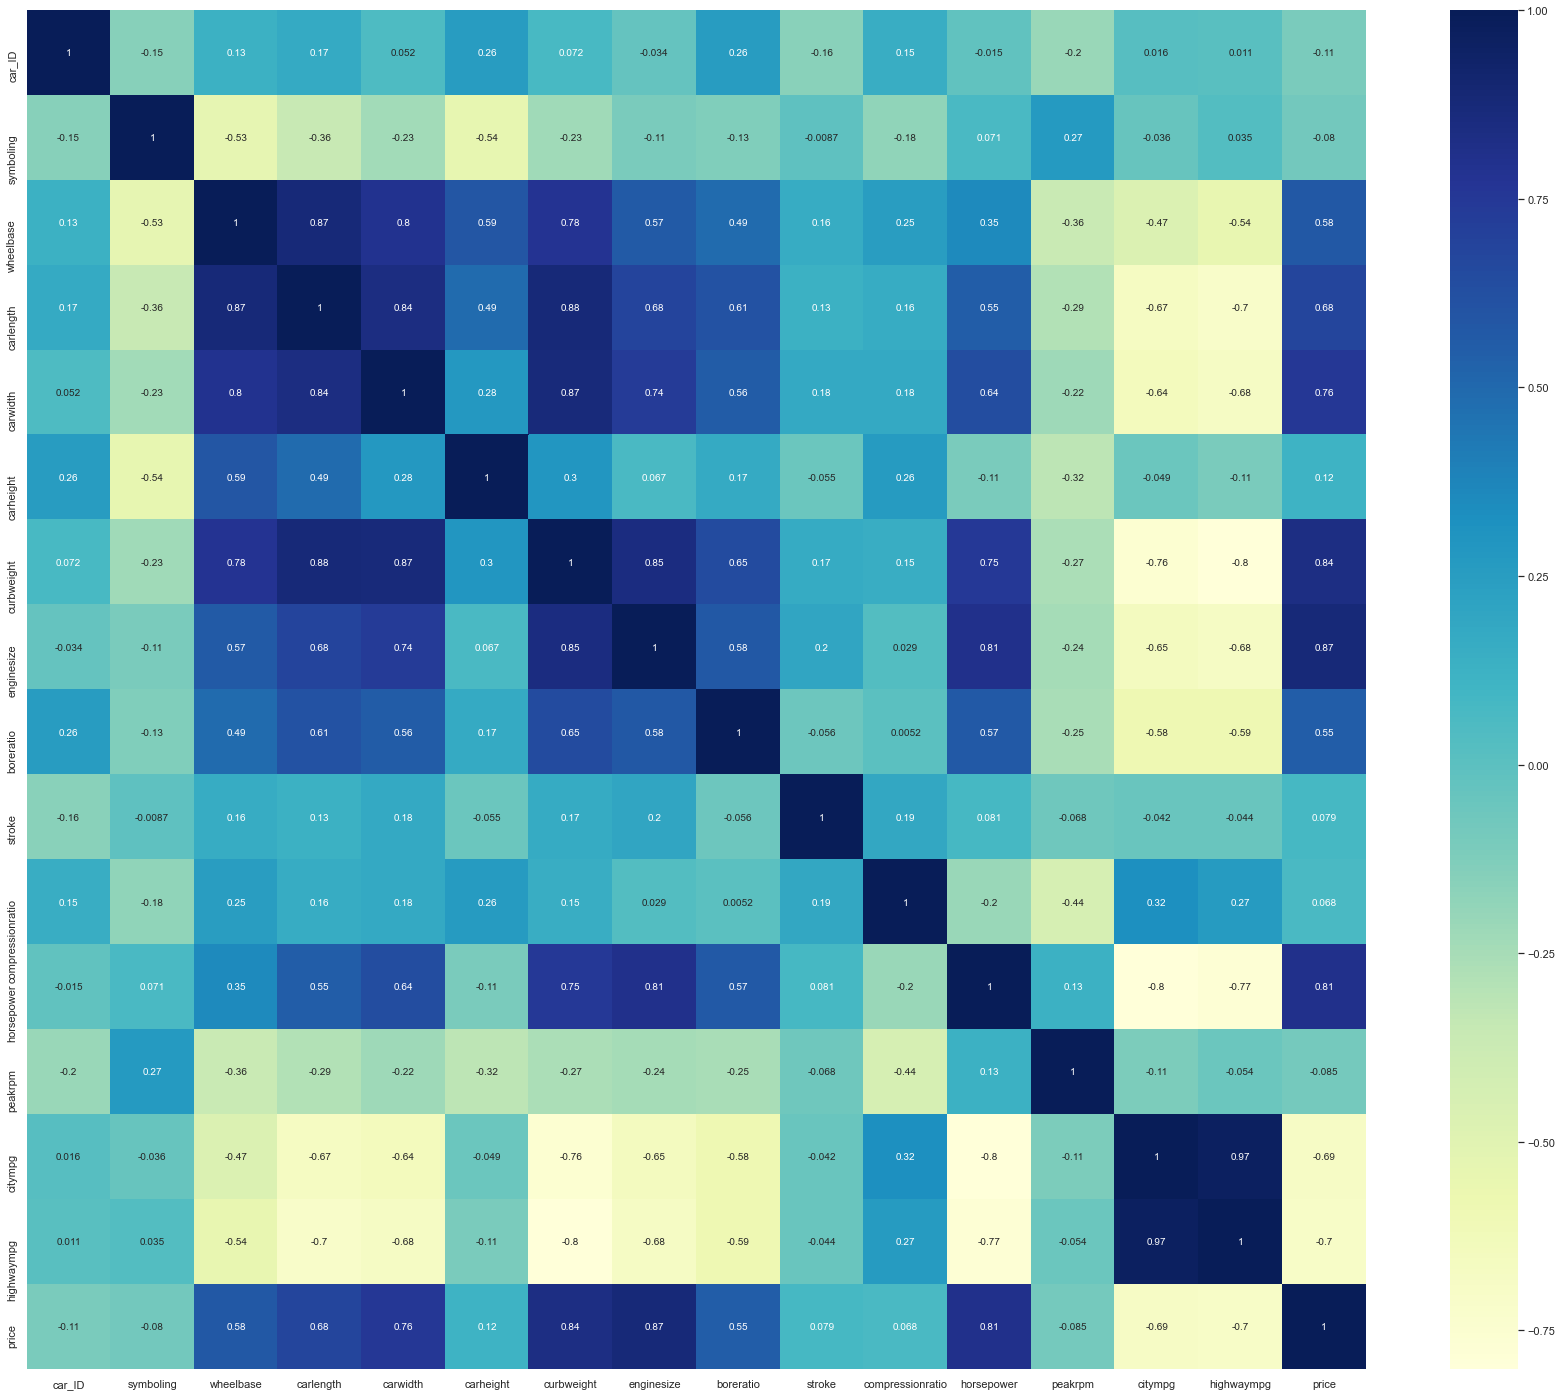

In [56]:
#Correlation using heatmap
##Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend
plt.figure(figsize = (30, 25))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

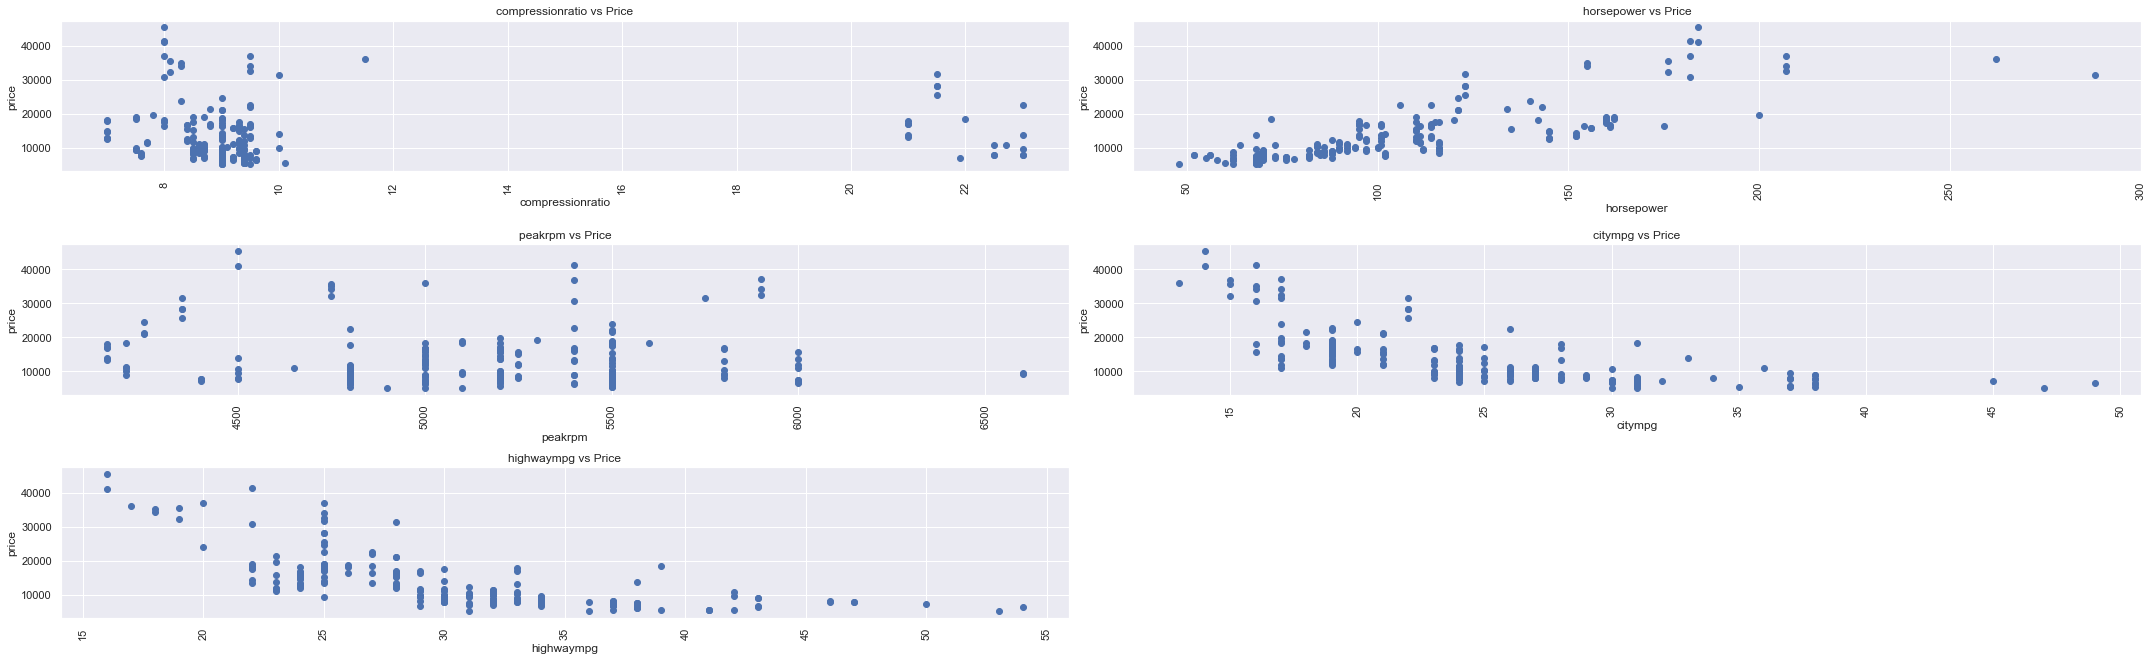

In [57]:
plt.figure(figsize=(30,15));
scatter_plot('compressionratio',1);
scatter_plot('horsepower',2);
scatter_plot('peakrpm',3);
scatter_plot('citympg',4);
scatter_plot('highwaympg',5);
plt.tight_layout();
#highwaympg, citympg, peakrpm, compression ratio show negative or no trend with price

In [51]:
#After visualizing both categorical and numerical columns it is clear that some columns show negative 
#or no trend in relation to price and have to be dropped

In [58]:
cols_to_drop=['highwaympg','citympg','peakrpm','compressionratio','stroke','doornumber','car_ID','symboling','enginelocation','CarName'];
data.drop(cols_to_drop,axis=1,inplace=True);
data.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price
0,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,13495.0
1,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,16500.0
2,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154,16500.0
3,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102,13950.0
4,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115,17450.0


In [59]:
print(data.shape);
data.info()

(205, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        205 non-null    object 
 1   aspiration      205 non-null    object 
 2   carbody         205 non-null    object 
 3   drivewheel      205 non-null    object 
 4   wheelbase       205 non-null    float64
 5   carlength       205 non-null    float64
 6   carwidth        205 non-null    float64
 7   carheight       205 non-null    float64
 8   curbweight      205 non-null    int64  
 9   enginetype      205 non-null    object 
 10  cylindernumber  205 non-null    object 
 11  enginesize      205 non-null    int64  
 12  fuelsystem      205 non-null    object 
 13  boreratio       205 non-null    float64
 14  horsepower      205 non-null    int64  
 15  price           205 non-null    float64
dtypes: float64(6), int64(3), object(7)
memory usage: 25.8+ KB


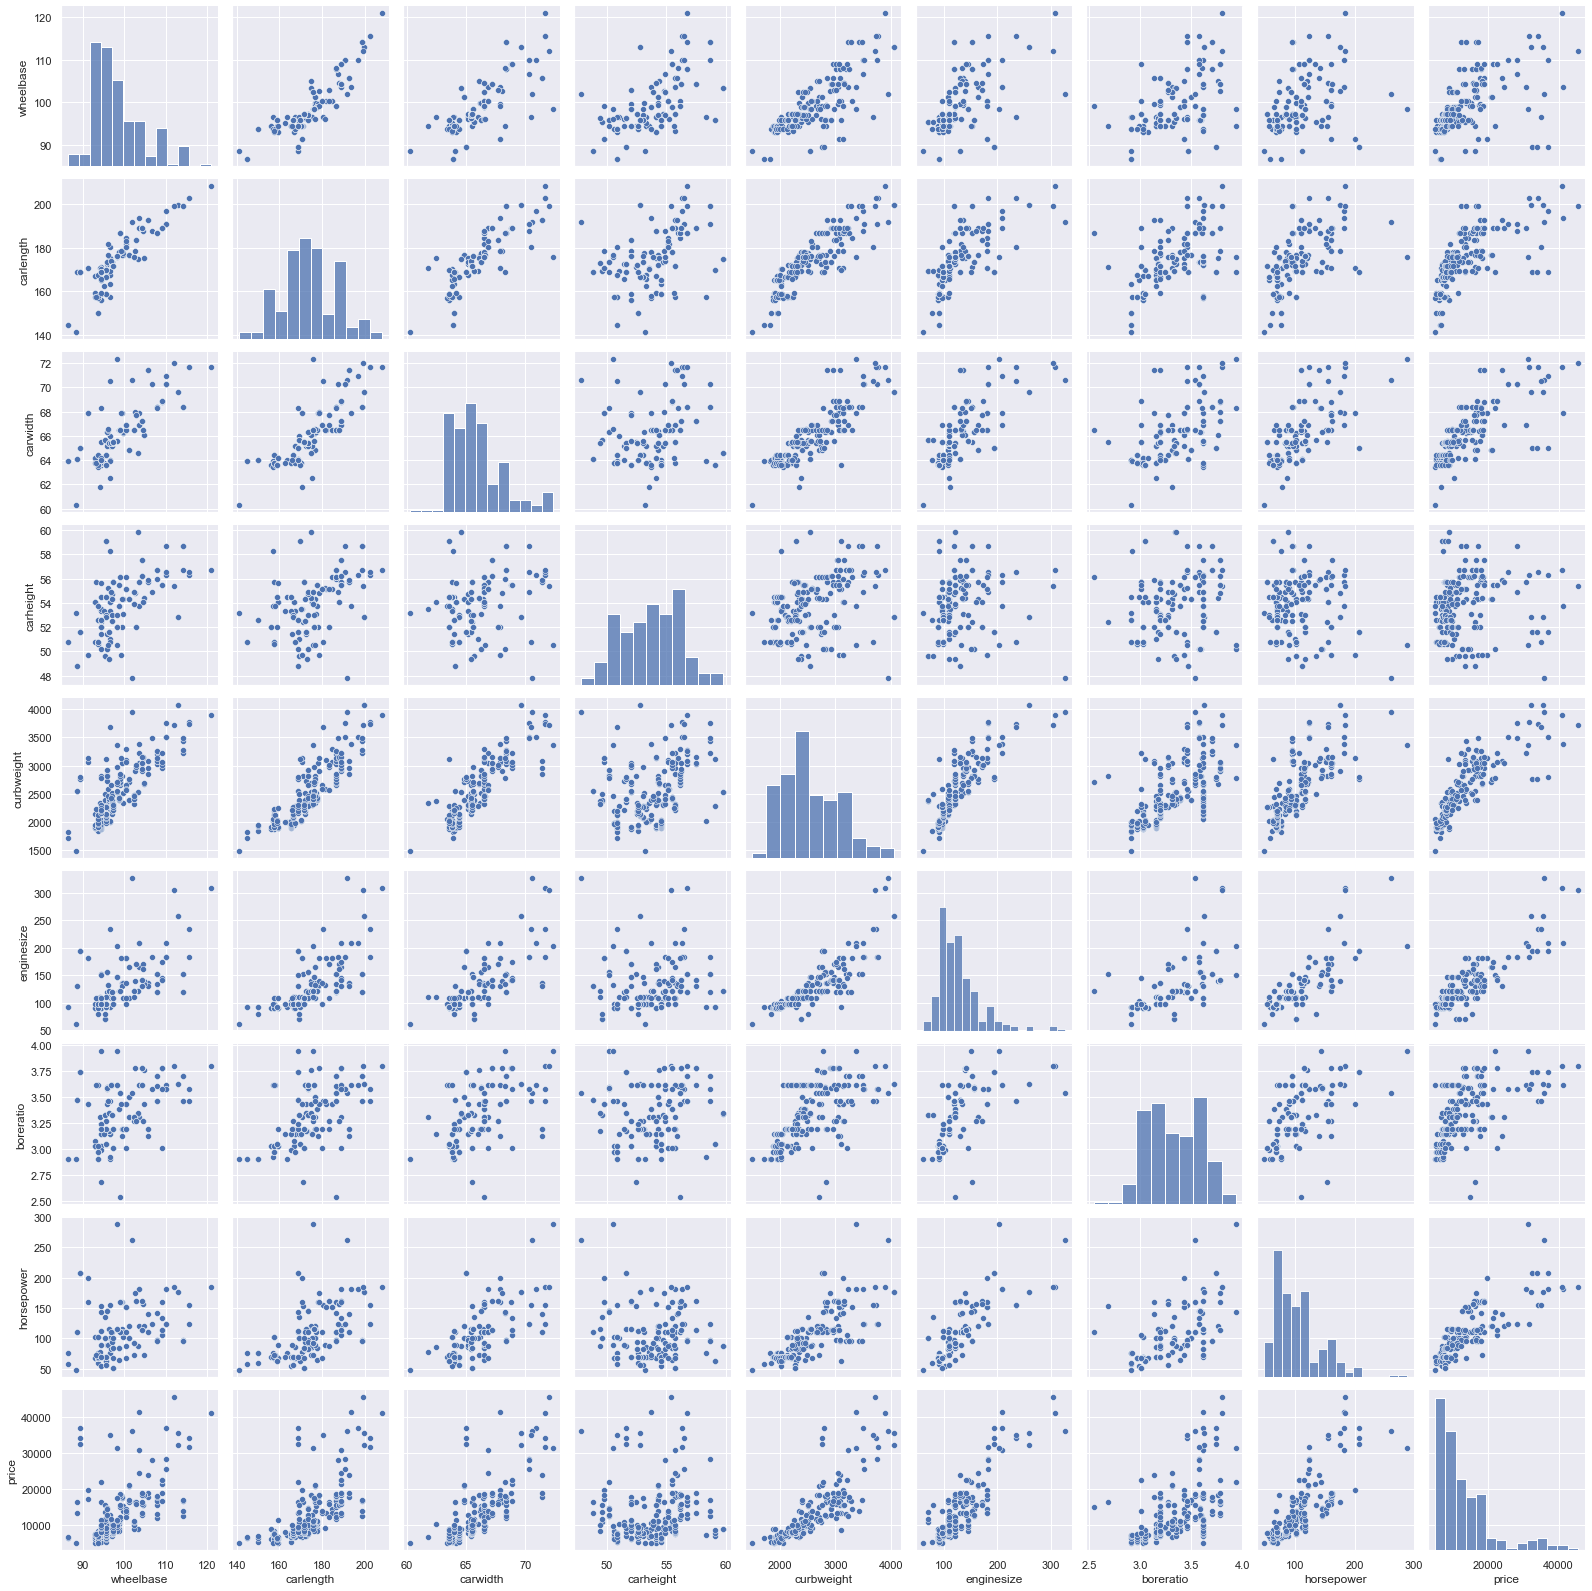

In [60]:
sns.pairplot(data)

In [61]:
#Separating Target and Features

In [62]:
y=data['price'];
X=data.drop('price',axis=1,inplace=True);
data.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower
0,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111
1,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111
2,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154
3,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102
4,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115


In [63]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,104.117073
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,39.544167
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,48.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,70.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,95.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,116.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,288.000000


In [64]:
print(data.shape);
data.info()

(205, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        205 non-null    object 
 1   aspiration      205 non-null    object 
 2   carbody         205 non-null    object 
 3   drivewheel      205 non-null    object 
 4   wheelbase       205 non-null    float64
 5   carlength       205 non-null    float64
 6   carwidth        205 non-null    float64
 7   carheight       205 non-null    float64
 8   curbweight      205 non-null    int64  
 9   enginetype      205 non-null    object 
 10  cylindernumber  205 non-null    object 
 11  enginesize      205 non-null    int64  
 12  fuelsystem      205 non-null    object 
 13  boreratio       205 non-null    float64
 14  horsepower      205 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 24.1+ KB


In [ ]:
#we can observe after cleaning and analysing the data that some columns were not showing any useful data pattern so we opted to drop them.
#data type of columns still contain object type,float type and int type we can observe we have5 float columns,3 int type and 7 object type columns.
#using correlational matrix we see Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend
# we can use training data to create a model by using RandomForestRegressor
#we also might label encode only those columns that match in both train and test dataset by importing LabelEncoder
#r2_score gives the run test